# SONG RECOMMENDATION (IN SPOTIFY)

# #importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mlt
from matplotlib import style

# read csv file

In [2]:
musicdata=pd.read_csv("genres_v2.csv")

C:\Users\sushm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
musicdata.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

# Describing the data

In [4]:
musicdata.describe()

danceability        energy           key      loudness          mode  \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.639364      0.762516      5.370240     -6.465442      0.549462   
std        0.156617      0.183823      3.666145      2.941165      0.497553   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.524000      0.632000      1.000000     -8.161000      0.000000   
50%        0.646000      0.803000      6.000000     -6.234000      1.000000   
75%        0.766000      0.923000      9.000000     -4.513000      1.000000   
max        0.988000      1.000000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  42305.000000  42305.000000      42305.000000  42305.000000   
mean       0.136561      0.096160          0.283048      0.214079   
std        0.126168      0.170827          0.370791      0.175576   
min        0.022700      0.000001          0.000000      0.010700   
25%        0.049100      0.001730          0.000000      0.099600   
50%        0.075500      0.016400          0.005940      0.135000   
75%        0.193000      0.107000          0.722000      0.294000   
max        0.946000      0.988000          0.989000      0.988000   

            valence         tempo    duration_ms  time_signature    Unnamed: 0  
count  42305.000000  42305.000000   42305.000000    42305.000000  20780.000000  
mean       0.357101    147.474056  250865.846685        3.972580  10483.970645  
std        0.233200     23.844623  102957.713571        0.268342   6052.359519  
min        0.018700     57.967000   25600.000000        1.000000      0.000000  
25%        0.161000    129.931000  179840.000000        4.000000   5255.750000  
50%        0.322000    144.973000  224760.000000        4.000000  10479.500000  
75%        0.522000    161.464000  301133.000000        4.000000  15709.250000  
max        0.988000    220.290000  913052.000000        5.000000  20999.000000

In [5]:
musicdata.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [6]:
musicdata['title'].isna().value_counts()

True     21525
False    20780
Name: title, dtype: int64

In [7]:
musicdata.drop(['Unnamed: 0','title'],axis = 1 , inplace=True)
#Removed Columns 

In [8]:
musicdata.shape

(42305, 20)

In [9]:
musicdata.duplicated().sum()

3218

Removing duplicate data

In [10]:
musicdata.drop_duplicates(inplace=True)

In [11]:
musicdata.duplicated().sum()

0

In [12]:
musicdata.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           17568
dtype: int64

In [13]:
musicdata.describe()

danceability        energy           key      loudness          mode  \
count  39087.000000  39087.000000  39087.000000  39087.000000  39087.000000   
mean       0.641866      0.752578      5.346023     -6.579929      0.552051   
std        0.156178      0.185433      3.665185      2.936771      0.497290   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.528000      0.620000      1.000000     -8.259500      0.000000   
50%        0.649000      0.788000      6.000000     -6.324000      1.000000   
75%        0.768000      0.915000      8.000000     -4.633000      1.000000   
max        0.988000      1.000000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  39087.000000  39087.000000      39087.000000  39087.000000   
mean       0.139169      0.102394          0.273075      0.213141   
std        0.127447      0.175721          0.369084      0.174436   
min        0.022700      0.000001          0.000000      0.010700   
25%        0.049200      0.001960          0.000000      0.100000   
50%        0.077500      0.019200          0.002720      0.135000   
75%        0.201000      0.120000          0.705000      0.291500   
max        0.946000      0.988000          0.989000      0.988000   

            valence         tempo    duration_ms  time_signature  
count  39087.000000  39087.000000   39087.000000    39087.000000  
mean       0.359543    147.760446  248366.953284        3.971525  
std        0.232463     24.360039  103105.040799        0.275717  
min        0.018700     57.967000   25600.000000        1.000000  
25%        0.164000    129.963000  176802.000000        4.000000  
50%        0.327000    144.947000  222740.000000        4.000000  
75%        0.525000    163.798500  297612.500000        4.000000  
max        0.988000    220.290000  913052.000000        5.000000

checking NAN values in column song_name

In [14]:
musicdata['song_name'].isna().value_counts()

False    21519
True     17568
Name: song_name, dtype: int64

# DATA ANALYSIS

In [15]:

from scipy.stats import skewnorm
style.use('seaborn')

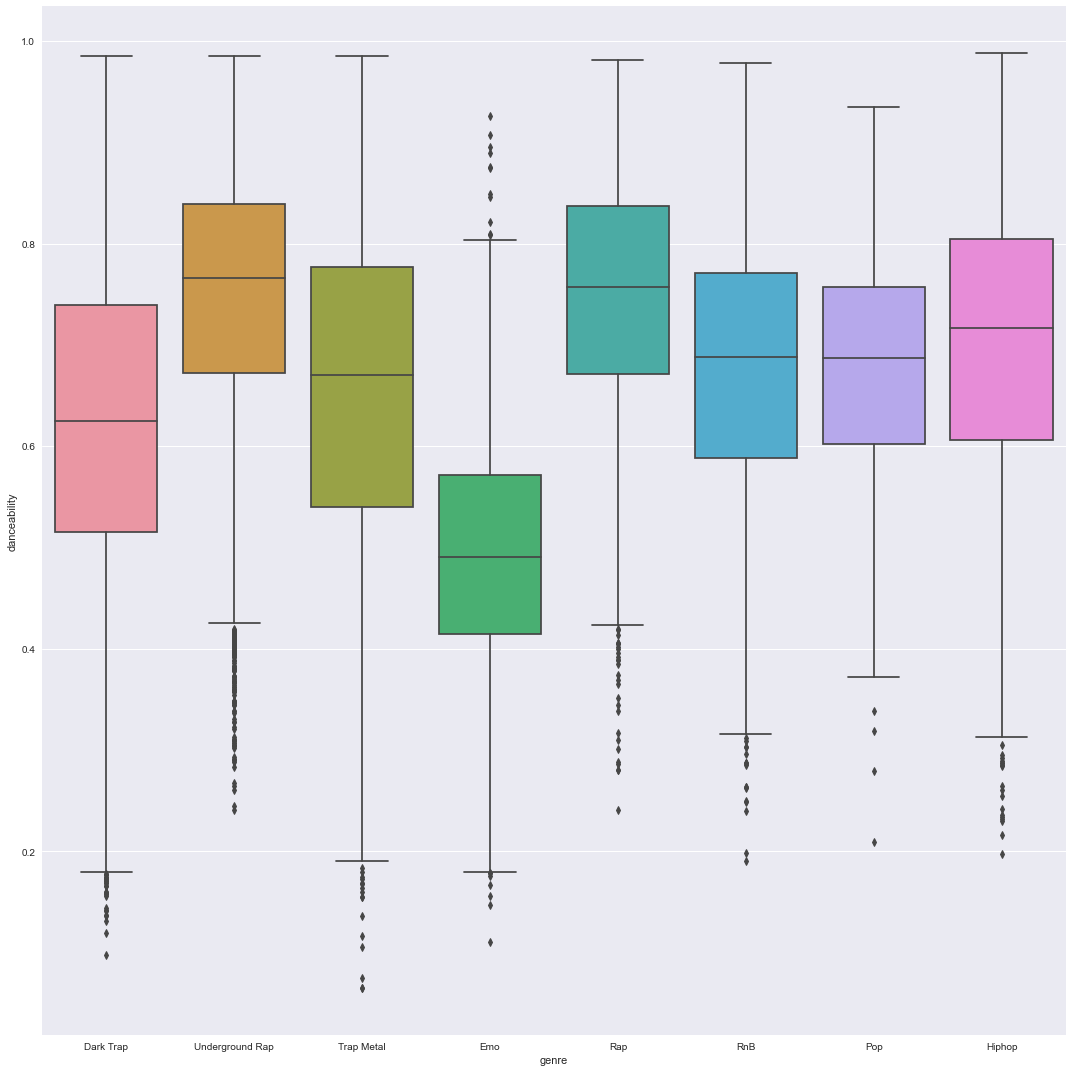

In [52]:
sb.catplot(data=musicdata,x='genre',y= 'danceability',kind='box',height=15)

# Distribution plot for all columns

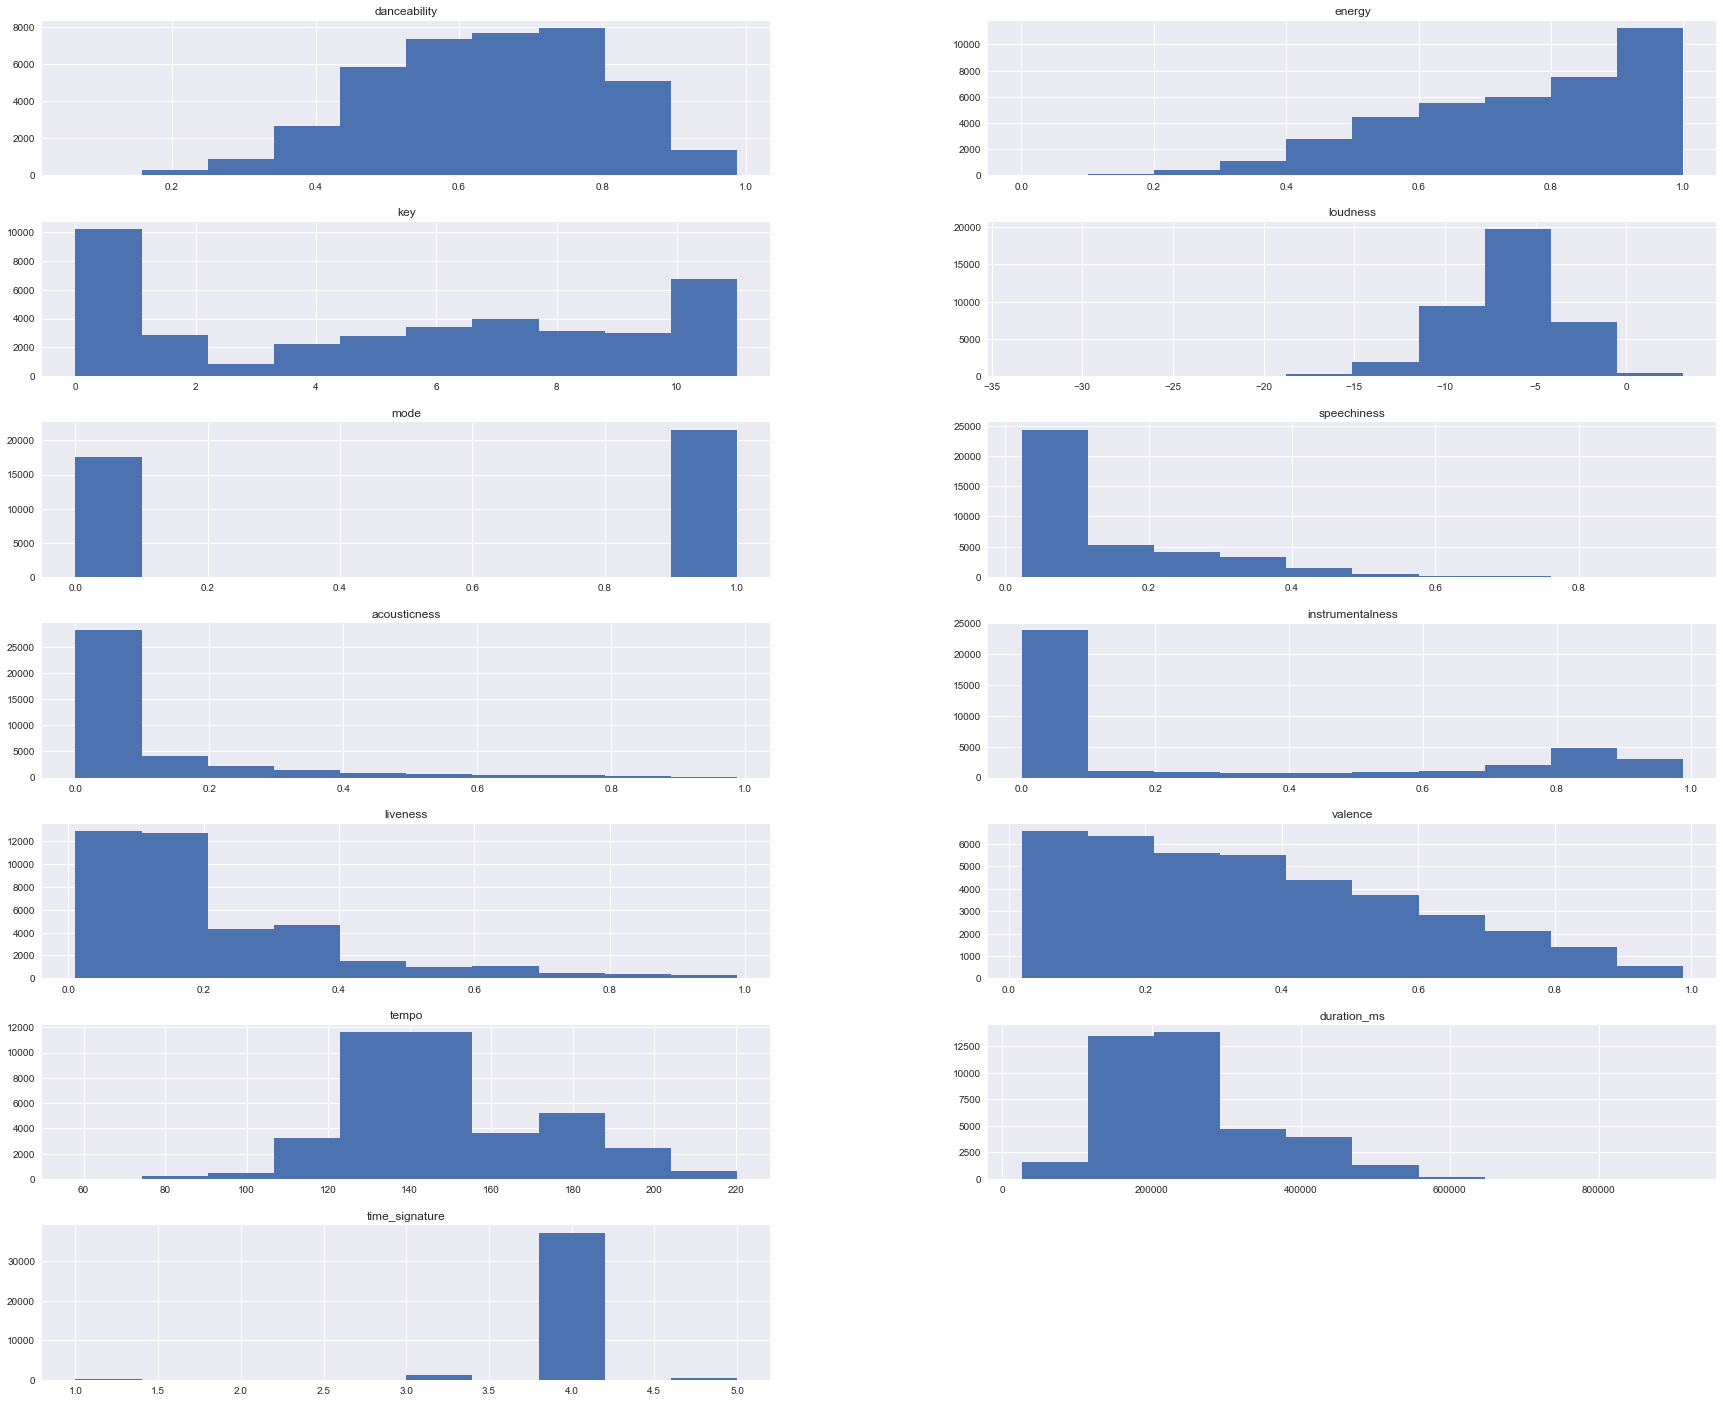

In [17]:

musicdata.hist(layout=(7,2),figsize=(30,25));

skewness of data

In [18]:
musicSkewness = musicdata.skew(axis=0)

musicSkewness = np.round(musicSkewness,decimals=2)

C:\Users\sushm\AppData\Local\Temp/ipykernel_8696/2319351431.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  musicSkewness = musicdata.skew(axis=0)


Function to find skewness

In [19]:
def FindSkewness(value):
    if value > 0: 
        return 'Positive Skewness'
    elif value < 0:
        return'Negative Skewness'
    return 'No Skewness'

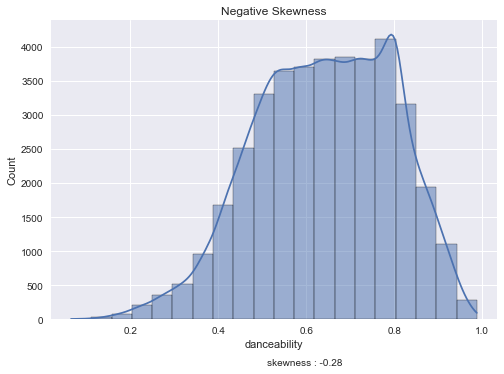

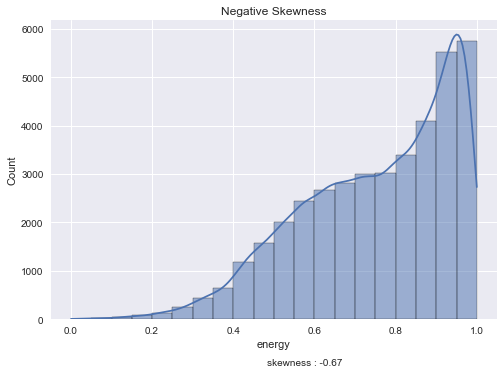

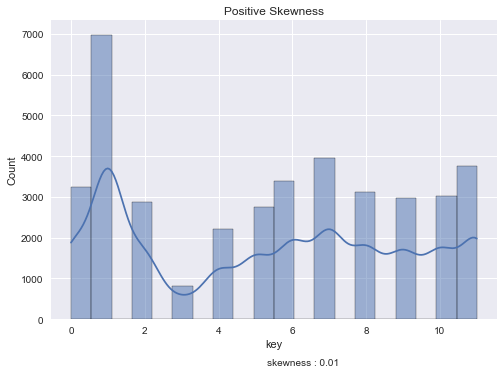

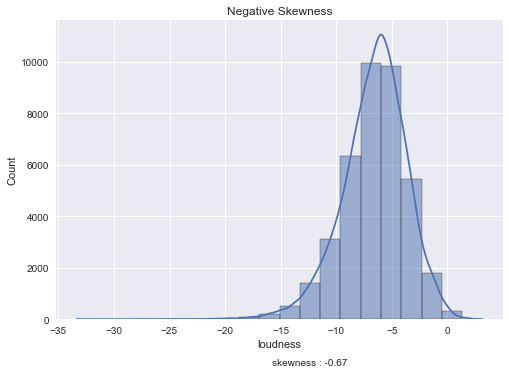

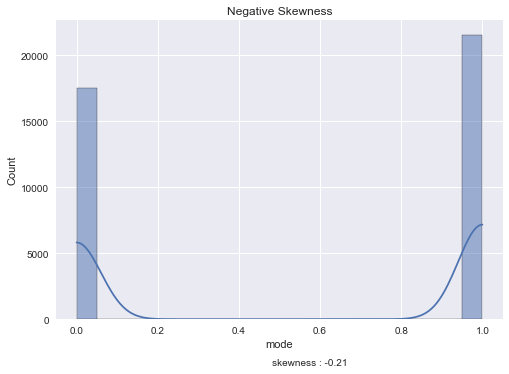

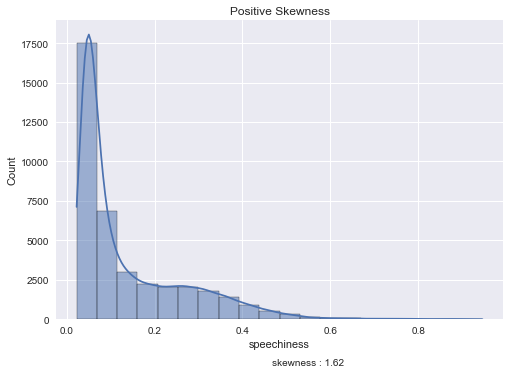

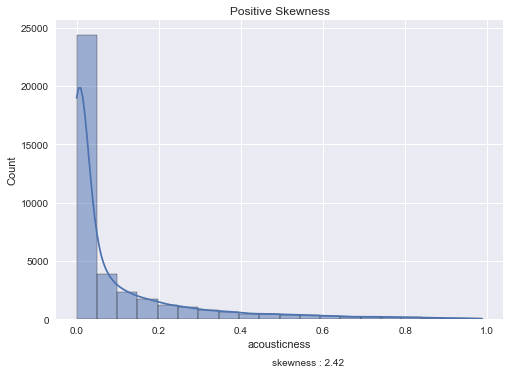

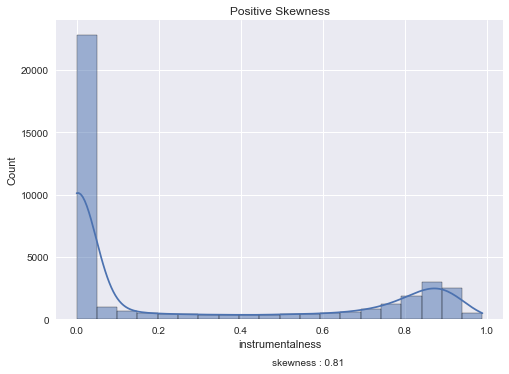

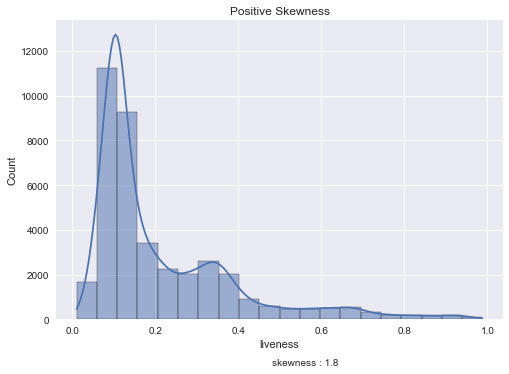

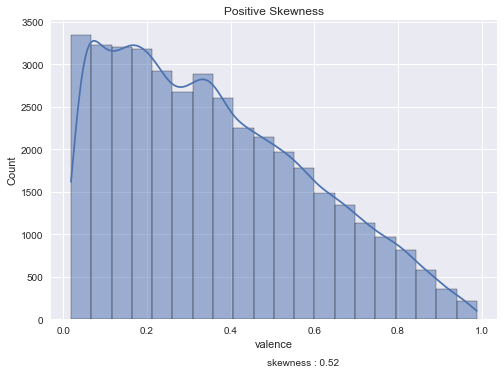

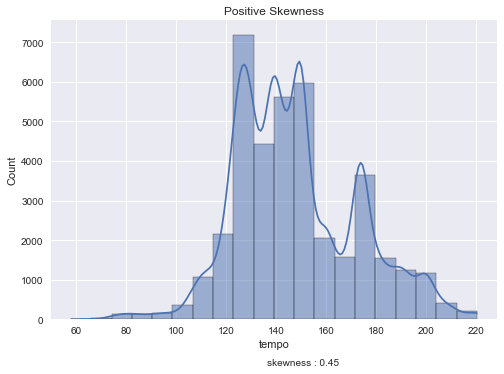

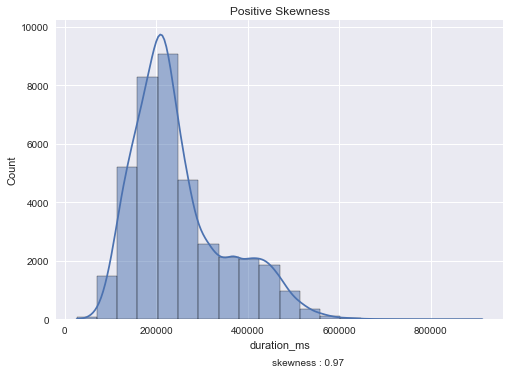

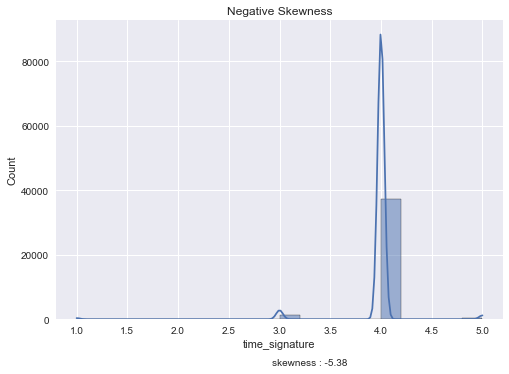

In [20]:
numeric_cols  = musicdata._get_numeric_data().columns.tolist()

for i, column in enumerate(numeric_cols):
    sb.histplot(musicdata[column],bins = 20,kde = True);
    conclusion = FindSkewness(musicSkewness[i])
    mlt.title(conclusion)
    mlt.figtext(0.5,0.01,f"skewness : {musicSkewness[i]}")
    mlt.show()

# Correalation among data

In [22]:
corrilation_data = musicdata.corr()
corrilation_data

danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.324406 -0.015604 -0.197016  0.075727   
energy               -0.324406  1.000000  0.045368  0.600010 -0.030036   
key                  -0.015604  0.045368  1.000000 -0.005554 -0.248237   
loudness             -0.197016  0.600010 -0.005554  1.000000  0.001318   
mode                  0.075727 -0.030036 -0.248237  0.001318  1.000000   
speechiness           0.196286 -0.149915 -0.028615  0.038025  0.048516   
acousticness          0.068153 -0.491990 -0.003190 -0.281558 -0.016120   
instrumentalness     -0.095280  0.310151  0.067427 -0.180686 -0.022776   
liveness             -0.196104  0.235807  0.002078  0.162987  0.011829   
valence               0.356139 -0.007664  0.027029  0.101510  0.016595   
tempo                -0.144718 -0.022869 -0.007547  0.140776 -0.006969   
duration_ms          -0.067885  0.302945  0.068583 -0.083798 -0.037685   
time_signature        0.059746  0.038722  0.007548  0.045267 -0.008689   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.196286      0.068153         -0.095280 -0.196104   
energy              -0.149915     -0.491990          0.310151  0.235807   
key                 -0.028615     -0.003190          0.067427  0.002078   
loudness             0.038025     -0.281558         -0.180686  0.162987   
mode                 0.048516     -0.016120         -0.022776  0.011829   
speechiness          1.000000      0.156752         -0.387559  0.052454   
acousticness         0.156752      1.000000         -0.260591 -0.109825   
instrumentalness    -0.387559     -0.260591          1.000000 -0.006406   
liveness             0.052454     -0.109825         -0.006406  1.000000   
valence              0.236388      0.101160         -0.280256 -0.018177   
tempo                0.164495      0.050502         -0.199962  0.023428   
duration_ms         -0.310292     -0.245393          0.603849  0.016295   
time_signature       0.022442     -0.048872         -0.010659  0.002784   

                   valence     tempo  duration_ms  time_signature  
danceability      0.356139 -0.144718    -0.067885        0.059746  
energy           -0.007664 -0.022869     0.302945        0.038722  
key               0.027029 -0.007547     0.068583        0.007548  
loudness          0.101510  0.140776    -0.083798        0.045267  
mode              0.016595 -0.006969    -0.037685       -0.008689  
speechiness       0.236388  0.164495    -0.310292        0.022442  
acousticness      0.101160  0.050502    -0.245393       -0.048872  
instrumentalness -0.280256 -0.199962     0.603849       -0.010659  
liveness         -0.018177  0.023428     0.016295        0.002784  
valence           1.000000  0.082028    -0.193046        0.041976  
tempo             0.082028  1.000000    -0.152905       -0.020284  
duration_ms      -0.193046 -0.152905     1.000000        0.003426  
time_signature    0.041976 -0.020284     0.003426        1.000000

# Heat map

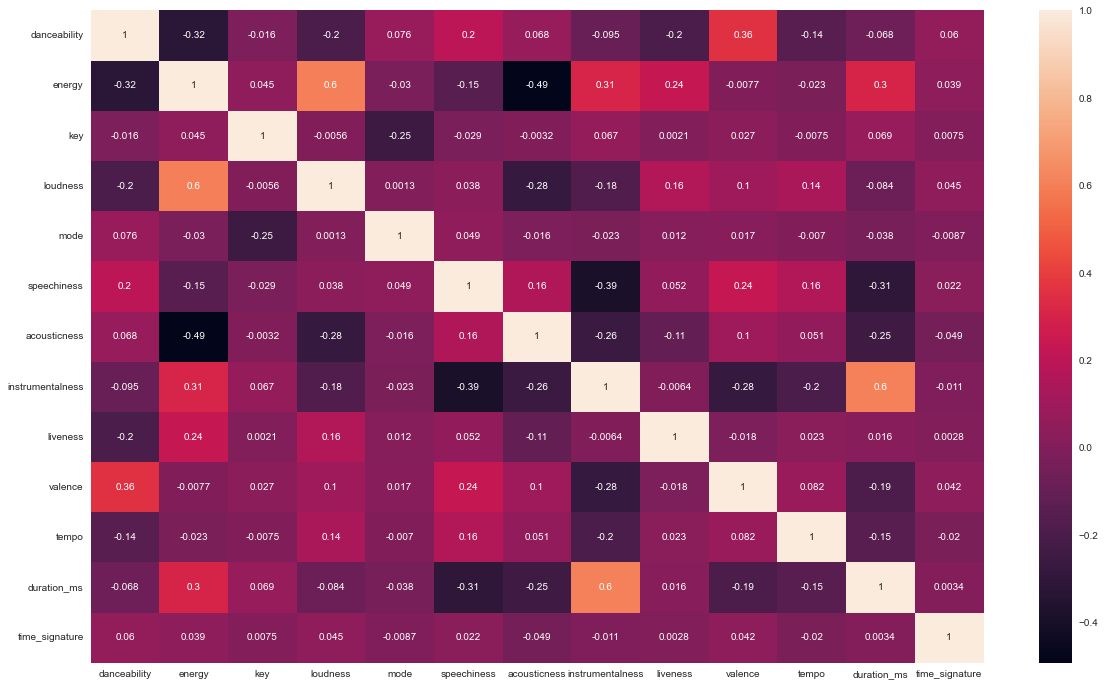

In [23]:
mlt.figure (figsize=(20, 12))
sb.heatmap(corrilation_data,annot=True);


Scatter plot to find relation among the features

C:\Users\sushm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


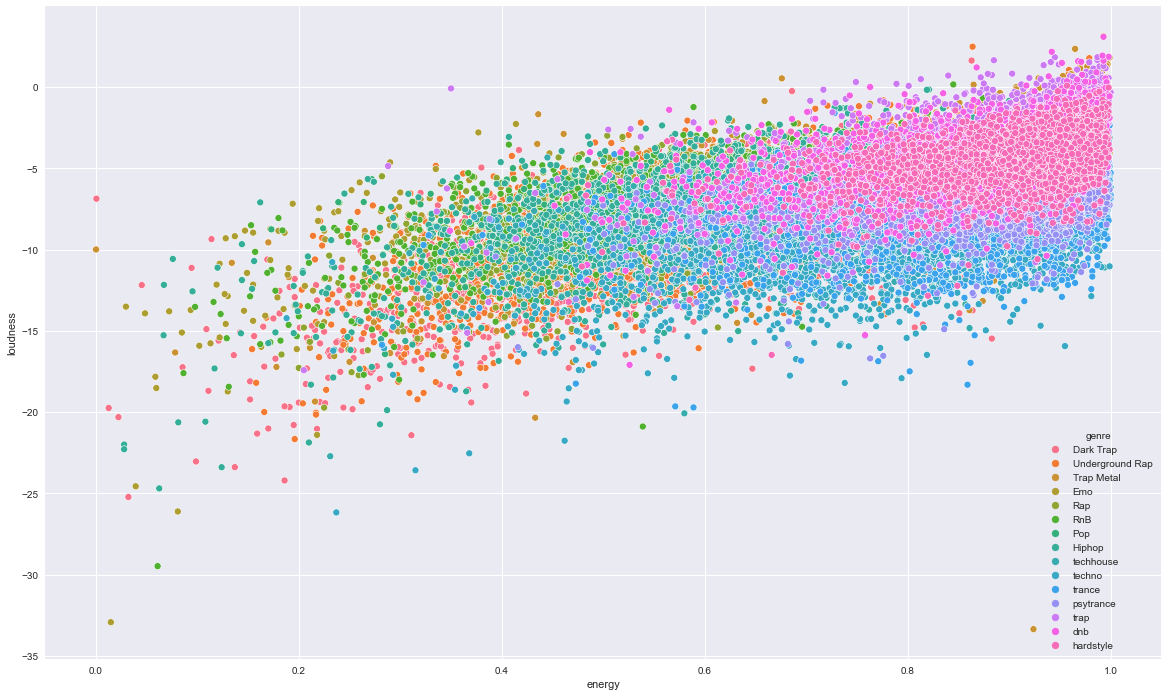

In [24]:
mlt.figure (figsize=(20, 12))
sb.scatterplot(musicdata['energy'],musicdata['loudness'],hue=musicdata['genre'],x_bins=30);

C:\Users\sushm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


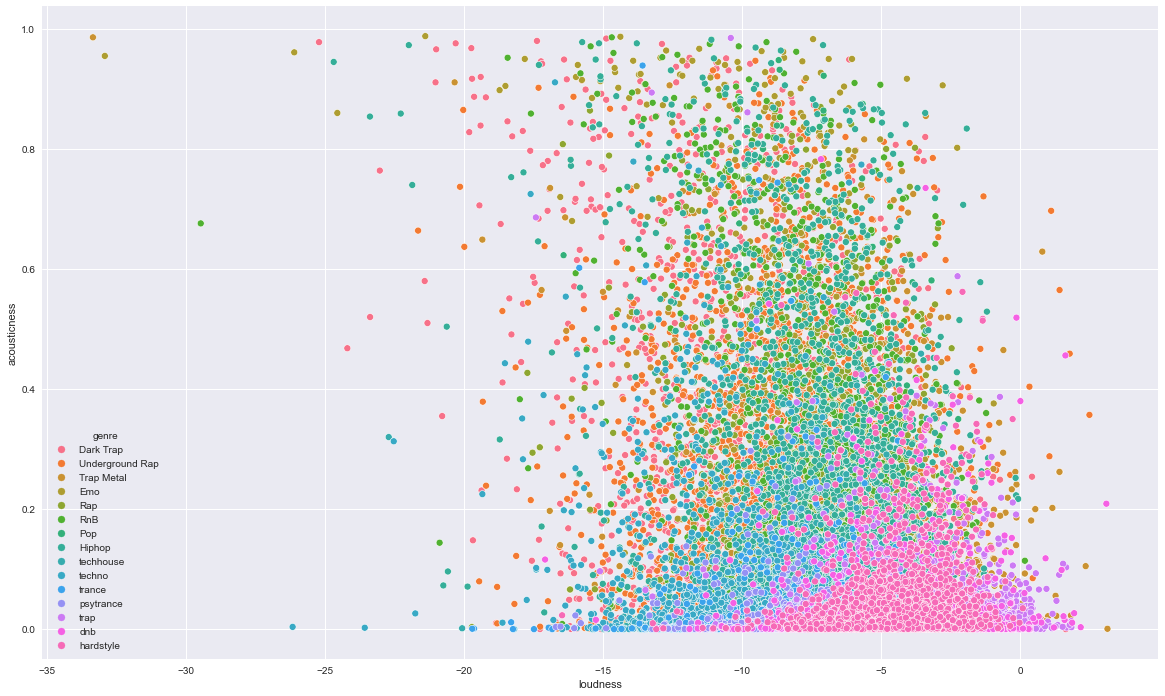

In [25]:
mlt.figure (figsize=(20, 12))
sb.scatterplot(musicdata['loudness'],musicdata['acousticness'],hue=musicdata['genre'],x_bins=30);

C:\Users\sushm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


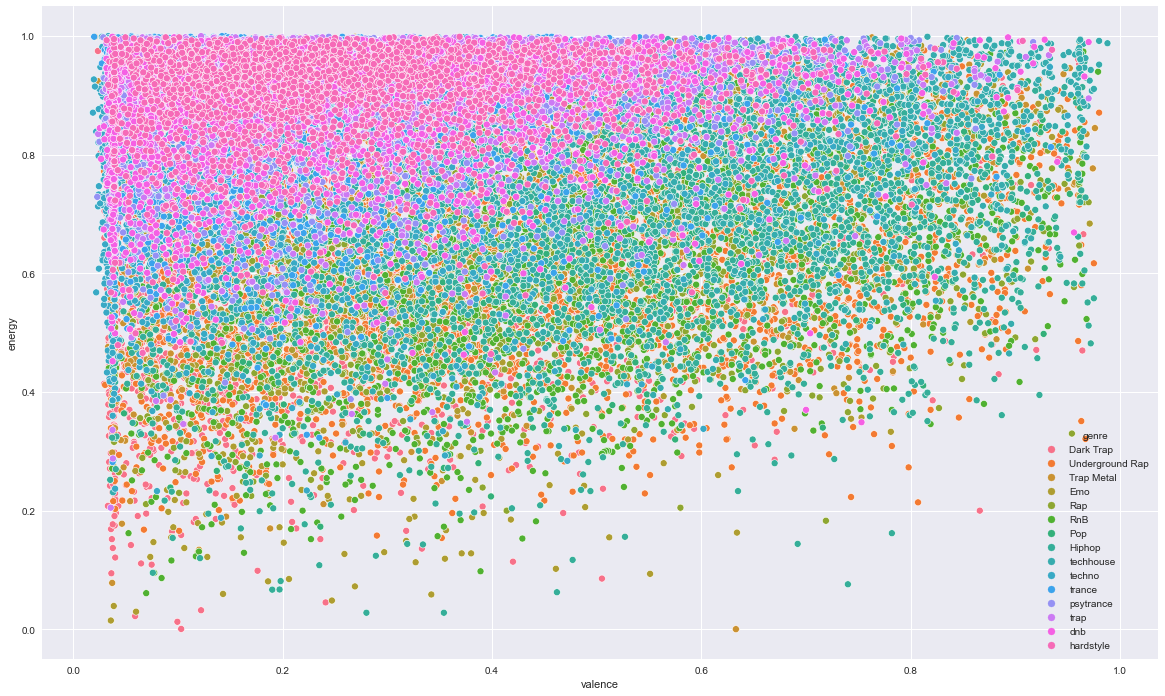

In [26]:
mlt.figure (figsize=(20, 12))
sb.scatterplot(musicdata['valence'],musicdata['energy'],hue=musicdata['genre'],x_bins=30);

C:\Users\sushm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


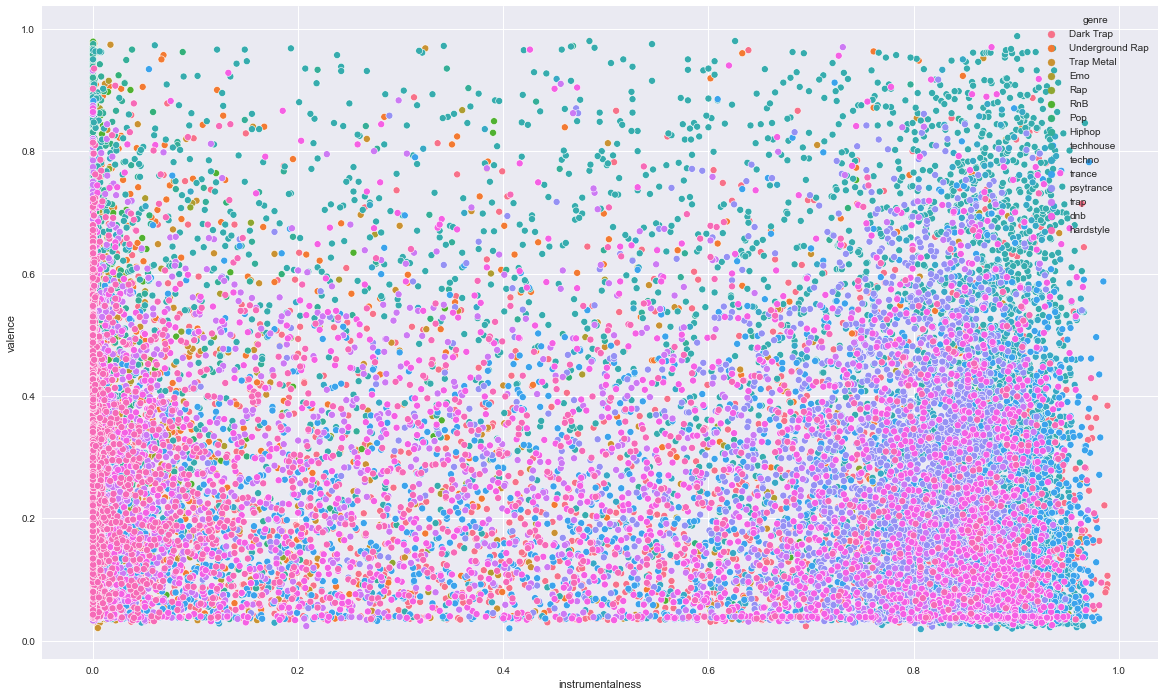

In [27]:
mlt.figure (figsize=(20, 12))
sb.scatterplot(musicdata['instrumentalness'],musicdata['valence'],hue=musicdata['genre'],x_bins=30);

drop column 'type' as it is same for all the rows

In [28]:
musicdata.drop(['type'],axis=1,inplace=True)

drop NAN values from 'song_name'

In [29]:
musicdata.dropna(subset=['song_name'],inplace=True)

In [30]:
#Create Machine Learning Models
musicdata.shape

(21519, 19)

# DATA PREPROCESSING

In [31]:
from sklearn import preprocessing
import math

considering only whose corrilation is more than 0.1 or -0.1

In [32]:
feature_cols = ['energy','loudness','valence','danceability','acousticness','instrumentalness','speechiness','tempo']

# Normalizing the data

In [33]:

normalized = preprocessing.normalize(musicdata[feature_cols])
normalized = pd.DataFrame(normalized,columns=feature_cols)

In [34]:
#finding the mean or center value for all songs
normalized['mean']  = normalized.mean(axis =1)

Function to find Out If Song Is Present In DataSet

In [35]:

def getSongIndex(songName):
    
    bool = musicdata['song_name'].isin([songName])
    # Getting Index Of Song If Present
    sindex = bool[bool==True].index[0]
    return sindex

Input song name

In [36]:

songName = 'Symbiote'

# Using 3 different models to recommend songs

# 1. Linear Kerenel model

In [37]:
from sklearn.metrics.pairwise import linear_kernel


# 2. Euclidean distances model

In [53]:
from sklearn.metrics.pairwise import euclidean_distances

# 3. Cosine similarity model

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
linear_kernal = linear_kernel(normalized)
euclidian = euclidean_distances(normalized)
consine = cosine_similarity(normalized)

# creating a recommendation function

In [41]:
def recommendation(m_name,model =linear_kernal):
    # default model is linear kernal 
    SongIndex = getSongIndex(m_name)
    score = list(enumerate(model[SongIndex]))
    sim_score = sorted(score,key = lambda x:x[1],reverse = True)
    sim_score = sim_score[1:11]
    Index = [i[0] for i in sim_score]
    return musicdata["song_name"].iloc[Index]

***Sorting techniques used in this sorting are merge sort and insertion sort

# Song recommendations using linear kernel model

In [50]:

recommendation(songName)

19256               Not Afraid
4187                Glock Cock
5051                 HOLOCAUST
12301                HOLOCAUST
15648    No More Parties In LA
4975                       333
8505                   THERAPY
4985      Memoirs Of A Gorilla
10675     Memoirs Of A Gorilla
15893     Memoirs Of A Gorilla
Name: song_name, dtype: object

# Song recommendations using Euclidean model

In [49]:

recommendation(songName,model =euclidian )

15770                             PP 15 Interlude
19633                          I'll Keep You Safe
2887                                        Intro
13312                           A Life So Changed
13504    Married Life (From "Up") [Piano Version]
19623                                    thankful
2754                                    sacrifice
15686                                         Yen
15789                                   Scoliosis
13272                                        Rose
Name: song_name, dtype: object

# Song recommendations using Cosine similarity model

In [45]:

recommendation(songName,model =consine )

586               Florida Thang
2044              Florida Thang
5692            Live Television
11441           Live Television
20733               Throw It Up
2276                         41
5126                         41
11433                        41
21279    Bammer (feat. Mustard)
8772                Riot Ballad
Name: song_name, dtype: object